In [1]:
from tqdm import trange
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

datasets = input_data.read_data_sets('insert_your_data_path', one_hot=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting /Users/urim/Data/MNIST_data/train-images-idx3-ubyte.gz
Extracting /Users/urim/Data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /Users/urim/Data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/urim/Data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
batch_size = 32
hidden_size = 256
LR = 0.005

In [18]:
inputs = tf.placeholder(tf.float32, shape=[None,784])
labels = tf.placeholder(tf.float32, shape=[None, 10])

##encoding
W1 = tf.Variable(tf.random_normal(shape=[784, hidden_size]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_size]))
encoder = tf.nn.sigmoid(tf.matmul(inputs, W1) + b1)

##Predicting
encoder_stop_gr = tf.stop_gradient(encoder)
W2 = tf.Variable(tf.random_normal(shape=[hidden_size, 10]))
b2 = tf.Variable(tf.random_normal(shape=[10]))
pred_linear = tf.matmul(encoder_stop_gr, W2) + b2
pred_outputs = tf.argmax(tf.nn.softmax(pred_linear), axis=1)

##decoding
W3 = tf.Variable(tf.random_normal(shape=[hidden_size, 784]))
b3 = tf.Variable(tf.random_normal(shape=[784]))
decoder_logits = tf.matmul(encoder, W3) + b3
decoder = tf.nn.sigmoid(decoder_logits)

########optimizing
#predicting
pred_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=pred_linear))
pred_optimizer = tf.train.AdamOptimizer(learning_rate=LR).minimize(pred_loss)
#decoding
decoder_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=inputs, logits=decoder_logits))
decoder_optimizer = tf.train.AdamOptimizer(learning_rate=LR).minimize(decoder_loss)

#accuracy
pred_accuracy = tf.reduce_mean(tf.cast(tf.equal(pred_outputs, tf.argmax(labels, axis=1)), tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in trange(10001):
        if i <= 9000:
            #decoder_train
            batch_tr_inputs, batch_tr_labels = datasets.train.next_batch(batch_size)
            feed_dict={inputs: batch_tr_inputs,labels: batch_tr_labels}
            _, decoder_tr_loss = sess.run([decoder_optimizer, decoder_loss], feed_dict=feed_dict)
            #decoder_validation
            batch_val_inputs, batch_val_labels = datasets.validation.next_batch(batch_size)
            feed_dict={inputs: batch_val_inputs,labels: batch_val_labels}
            decoder_val_loss = sess.run(decoder_loss, feed_dict=feed_dict)
            
            if i % 1000 == 0:
                print('step: {}, decoder_tr_loss: {}, decoder_val_loss: {}'.format(i, decoder_tr_loss, decoder_val_loss))
        else:
            #pred_train
            batch_tr_inputs, batch_tr_labels = datasets.train.next_batch(batch_size)
            feed_dict={inputs: batch_tr_inputs,labels: batch_tr_labels}
            _, pred_tr_loss, pred_tr_acc, decoder_tr_loss = sess.run([pred_optimizer, pred_loss, pred_accuracy, decoder_loss], 
                                                                     feed_dict=feed_dict)
            #pred_validation
            batch_val_inputs, batch_val_labels = datasets.validation.next_batch(batch_size)
            feed_dict={inputs: batch_val_inputs,labels: batch_val_labels}
            pred_val_loss, pred_val_acc, decoder_val_loss = sess.run([pred_loss, pred_accuracy, decoder_loss], 
                                                                     feed_dict=feed_dict)
            
            if i % 1000 == 0:
                print('step: {}, pred_tr_loss: {:.4f}, pred_val_loss: {:.4f}'.format(i, pred_tr_loss, pred_val_loss))
                print('step: {}, decoder_tr_loss: {:.4f}, decoder_val_loss: {:.4f}'.format(i, decoder_tr_loss, decoder_val_loss))
                print('step: {}, pred_tr_acc: {:.2f}, pred_val_acc: {:.2f}'.format(i, pred_tr_acc, pred_val_acc))
         
    batch_te_inputs, batch_te_labels = datasets.test.next_batch(batch_size)
    feed_dict = {inputs: batch_te_inputs,labels: batch_te_labels}
    decoder_te_loss, pred_te_loss, pred_te_acc, decoder_outputs, pred_outputs = sess.run([decoder_loss, pred_loss, pred_accuracy, decoder, pred_outputs], 
                                                                                          feed_dict=feed_dict)
    print('\nTest')
    print('decoder_te_loss: {:.4f}, pred_te_loss: {:.4f}, pred_te_acc: {:.2f}'.format(decoder_te_loss, pred_te_loss, pred_te_acc))         

  0%|          | 23/10001 [00:00<02:05, 79.76it/s]

step: 0, decoder_tr_loss: 4.407607555389404, decoder_val_loss: 4.002101421356201


 10%|█         | 1023/10001 [00:06<00:53, 166.45it/s]

step: 1000, decoder_tr_loss: 0.21457123756408691, decoder_val_loss: 0.20303791761398315


 20%|██        | 2020/10001 [00:13<00:46, 170.63it/s]

step: 2000, decoder_tr_loss: 0.1478598266839981, decoder_val_loss: 0.14386782050132751


 30%|███       | 3033/10001 [00:19<00:41, 168.94it/s]

step: 3000, decoder_tr_loss: 0.13973063230514526, decoder_val_loss: 0.12986044585704803


 40%|████      | 4020/10001 [00:29<00:53, 111.33it/s]

step: 4000, decoder_tr_loss: 0.1227836087346077, decoder_val_loss: 0.12403254956007004


 50%|█████     | 5022/10001 [00:36<00:30, 163.00it/s]

step: 5000, decoder_tr_loss: 0.12682795524597168, decoder_val_loss: 0.11108958721160889


 60%|██████    | 6028/10001 [00:43<00:24, 159.25it/s]

step: 6000, decoder_tr_loss: 0.11766046285629272, decoder_val_loss: 0.10999281704425812


 70%|███████   | 7024/10001 [00:49<00:17, 166.49it/s]

step: 7000, decoder_tr_loss: 0.09062881767749786, decoder_val_loss: 0.12155816704034805


 80%|████████  | 8033/10001 [00:57<00:11, 168.03it/s]

step: 8000, decoder_tr_loss: 0.09542646259069443, decoder_val_loss: 0.09997006505727768


 90%|█████████ | 9037/10001 [01:04<00:05, 182.84it/s]

step: 9000, decoder_tr_loss: 0.08682951331138611, decoder_val_loss: 0.1011994257569313


100%|██████████| 10001/10001 [01:08<00:00, 267.18it/s]

step: 10000, pred_tr_loss: 0.487060, pred_val_loss: 0.807358
step: 10000, decoder_tr_loss: 0.092132, decoder_val_loss: 0.104572
step: 10000, pred_tr_acc: 0.875000, pred_val_acc: 0.750000

Test
decoder_te_loss: 0.097163, pred_te_loss: 0.865089, pred_te_acc: 0.718750


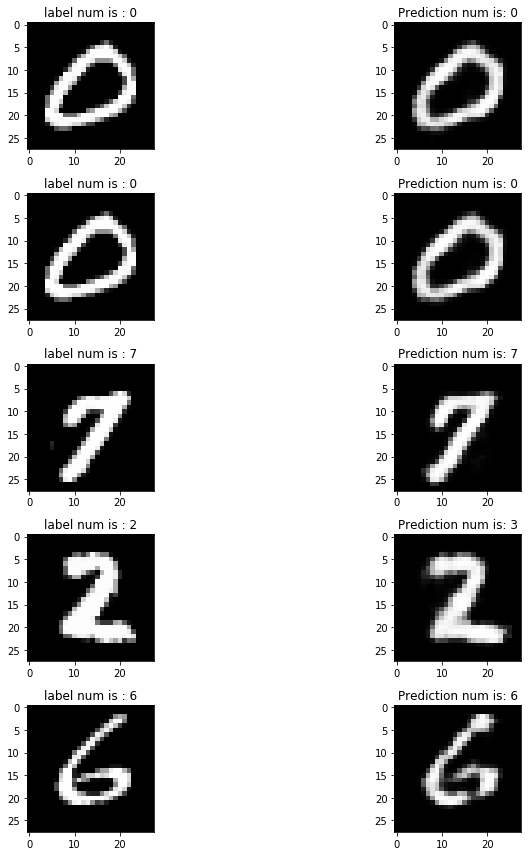

In [20]:
#Visualization
%matplotlib inline
import numpy as np
plt.figure(figsize=[12,12])
choice_num = 5
rand_index = np.random.choice(batch_size, choice_num)
for i in range(5):
    nrow = 5
    ncol = 2
    plt.subplot(nrow,ncol,2*i+1)
    plt.title('label num is : {}'.format(np.argmax(batch_te_labels[rand_index][i])))
    plt.tight_layout()
    plt.imshow(batch_te_inputs[rand_index][i].reshape(28,28), cmap='gray')

    plt.subplot(nrow,ncol,2*i+2)
    plt.title('Prediction num is: {}'.format(pred_outputs[rand_index][i]))
    plt.tight_layout()
    plt.imshow(decoder_outputs[rand_index][i].reshape(28,28), cmap='gray')